<a href="https://colab.research.google.com/github/monakeshvari/Loan-amount-paid-predictor/blob/main/Loan_amount_paid_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

## Read Data

In [456]:
# Connect google colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [457]:
# Read data
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/loans.csv')

## Dataset Exploration

In [458]:
df
# 5 first rows of dataset
df.head()

,client_id,loan_type,loan_amount,repaid,loan_id,loan_start,loan_end,rate
0,46109,home,13672,0,10243,2002-04-16,2003-12-20,2.15
1,46109,credit,9794,0,10984,2003-10-21,2005-07-17,1.25
2,46109,home,12734,1,10990,2006-02-01,2007-07-05,0.68
3,46109,cash,12518,1,10596,2010-12-08,2013-05-05,1.24
4,46109,credit,14049,1,11415,2010-07-07,2012-05-21,3.13


In [459]:
df.shape

(443, 8)

In [460]:
df.dtypes

# the object type must be converted to numeric type

client_id        int64
loan_type       object
loan_amount      int64
repaid           int64
loan_id          int64
loan_start      object
loan_end        object
rate           float64
dtype: object

In [461]:
df.columns

Index(['client_id', 'loan_type', 'loan_amount', 'repaid', 'loan_id',
       'loan_start', 'loan_end', 'rate'],
      dtype='object')

In [462]:
# sum of columns' Nans of dataset
df.isnull().sum()

client_id      0
loan_type      0
loan_amount    0
repaid         0
loan_id        0
loan_start     0
loan_end       0
rate           0
dtype: int64

In [463]:
# Statistical characteristics of each column
df.describe()

,client_id,loan_amount,repaid,loan_id,rate
count,443.000000,443.000000,443.000000,443.000000,443.000000
mean,38911.060948,7982.311512,0.534989,11017.101580,3.217156
std,7768.681063,4172.891992,0.499338,581.826222,2.397168
min,25707.000000,559.000000,0.000000,10009.000000,0.010000
25%,32885.000000,4232.500000,0.000000,10507.500000,1.220000
50%,39505.000000,8320.000000,1.000000,11033.000000,2.780000
75%,46109.000000,11739.000000,1.000000,11526.000000,4.750000
max,49624.000000,14971.000000,1.000000,11991.000000,12.620000


In [464]:
# duplicated columns
df.duplicated().sum()

0

In [465]:
# Define unique values
print(f'unique values in each columns : ')
print(df.nunique())

print(100 * '=')
for col in df.columns[[0, 1, 3]]:
  print(f'{col} :')
  print(df[col].unique())

unique values in each columns : 
client_id       25
loan_type        4
loan_amount    438
repaid           2
loan_id        443
loan_start     430
loan_end       428
rate           336
dtype: int64
client_id :
[46109 49545 41480 46180 25707 39505 32726 35089 35214 48177 26326 42320
 32961 29841 44601 32885 49068 44387 39384 26695 38537 46958 41472 49624
 26945]
loan_type :
['home' 'credit' 'cash' 'other']
repaid :
[0 1]


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443 entries, 0 to 442
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   client_id    443 non-null    int64  
 1   loan_type    443 non-null    object 
 2   loan_amount  443 non-null    int64  
 3   repaid       443 non-null    int64  
 4   loan_id      443 non-null    int64  
 5   loan_start   443 non-null    object 
 6   loan_end     443 non-null    object 
 7   rate         443 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 27.8+ KB


### Visualization

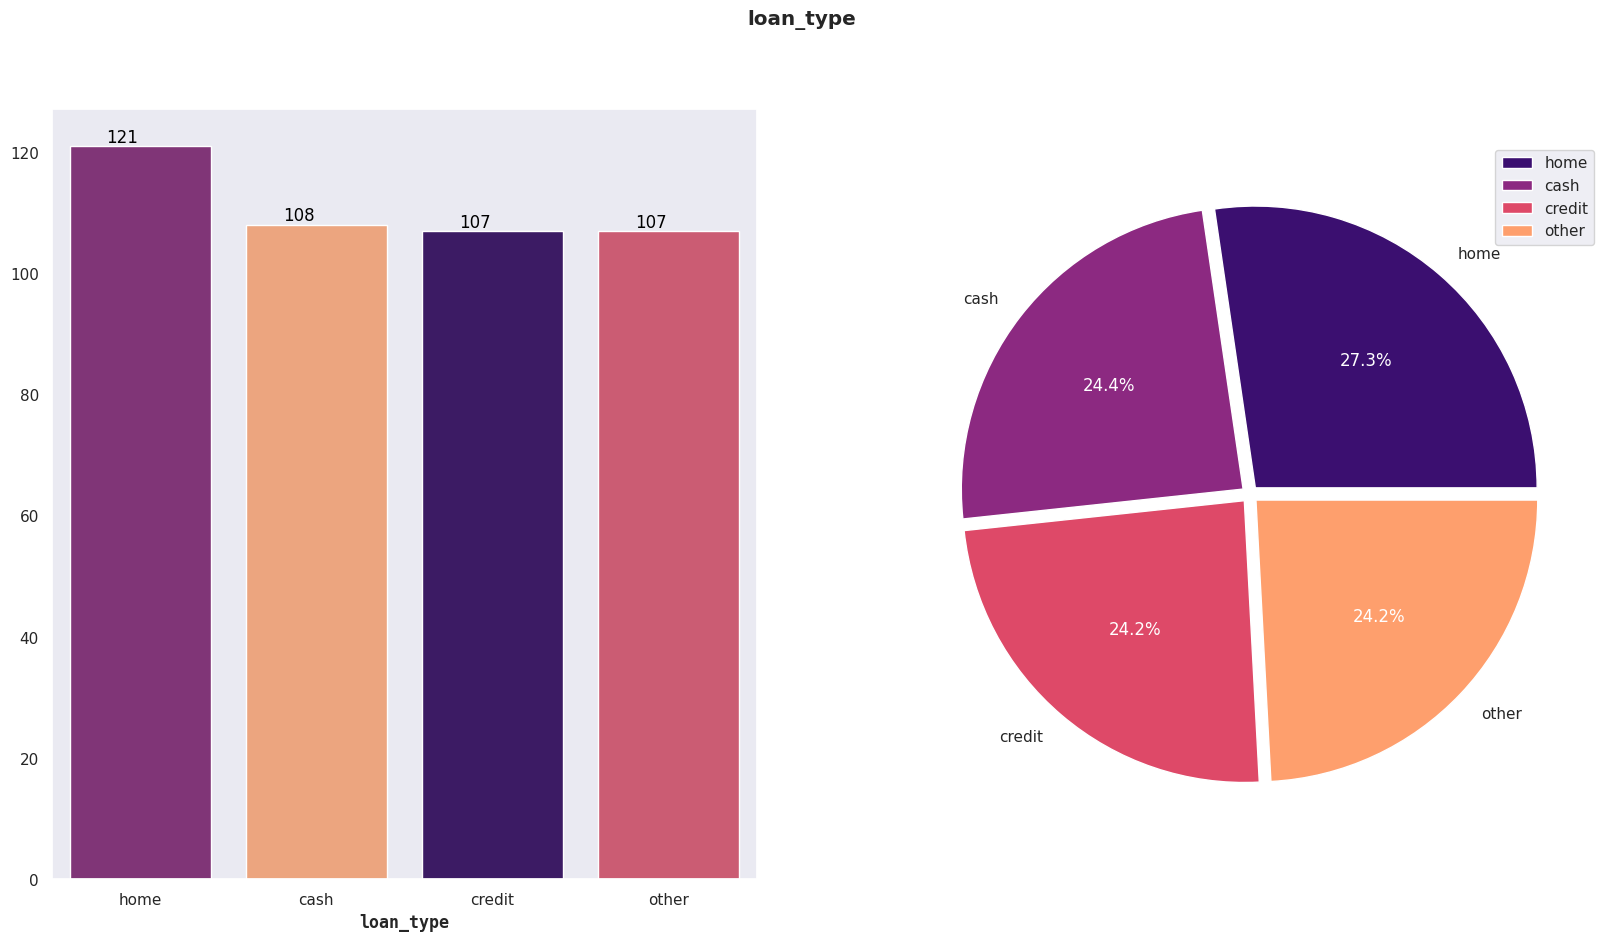

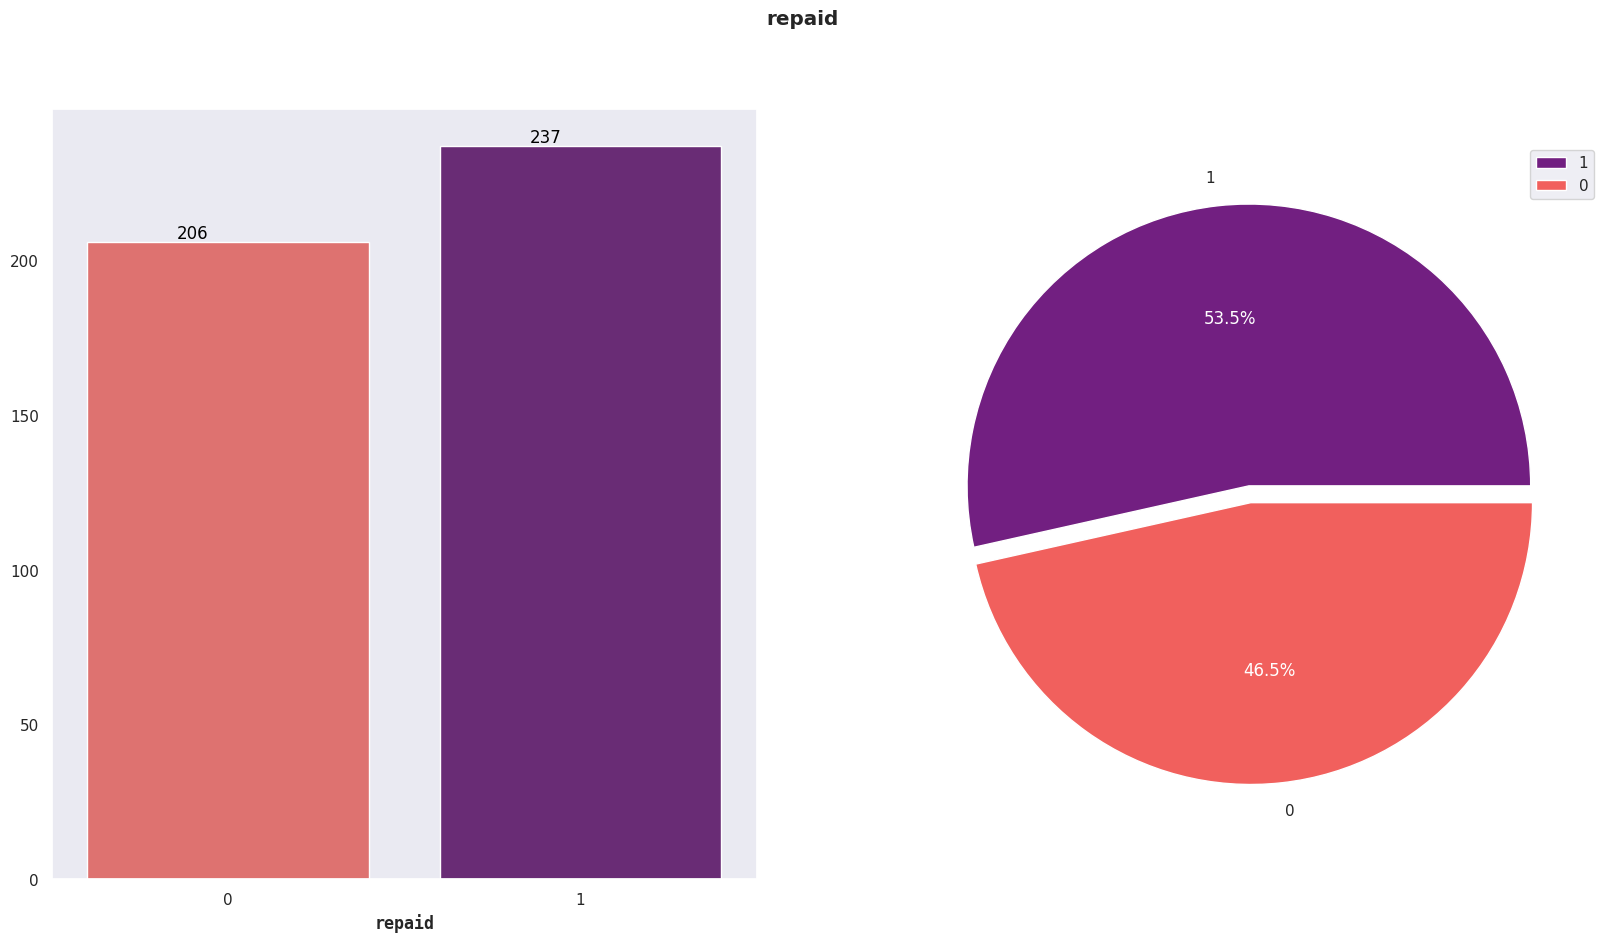

In [467]:
# Value Counts of columns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def valuecount_visualization(df, col):
  # Data preparation
  x = df[col].value_counts().index
  y = df[col].value_counts().values
  data = df.groupby(col).size()

  # Seaborn settings
  sns.set(style='dark', color_codes=True)
  pal = sns.color_palette('magma', len(data))
  rank = data.argsort().argsort()

  # Plotting the charts
  fig, ax = plt.subplots(1, 2, figsize=(20, 10))

  # Bar plot
  sns.barplot(x=x, y=y, hue=x, palette=list(np.array(pal[::-1])[rank]), ax=ax[0], legend=False)
  ax[0].set_xlabel(col, weight='semibold', fontname='monospace')
  for p in ax[0].patches:
      ax[0].annotate(f'{p.get_height():.0f}', (p.get_x() + 0.3, p.get_height()), ha='center', va='bottom', color='black')

  # Pie chart
  _, _, autotexts = ax[1].pie(y, labels=x, colors=pal, autopct='%1.1f%%', explode=[0.03] * len(x))
  for autotext in autotexts:
      autotext.set_color('white')

  # Final Settings
  plt.legend(bbox_to_anchor=(1, 1))
  plt.suptitle(col, weight='bold')
  plt.show()

# Columns to value counts visualization
columns=['loan_type', 'repaid']
for col in columns:
  valuecount_visualization(df, col)

## Dataset Preprocessing

### Handle duplicated rows

In [468]:
df.duplicated().sum()

# There are no duplicate row

0

### Drop unnecessary columns

In [469]:
df2 = df.drop(['client_id', 'loan_id'], axis=1)
df2.head()

,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,home,13672,0,2002-04-16,2003-12-20,2.15
1,credit,9794,0,2003-10-21,2005-07-17,1.25
2,home,12734,1,2006-02-01,2007-07-05,0.68
3,cash,12518,1,2010-12-08,2013-05-05,1.24
4,credit,14049,1,2010-07-07,2012-05-21,3.13


### Handle missing values

In [470]:
# There are no Nans values and this code snippet is for more practice
from sklearn.impute import SimpleImputer

# Define the simpleImputer function
def sImputer(data, columns):
  for column in columns:
    dtype = data[column].dtype
    strategy = 'most_frequent' if dtype=='object' else 'mean'
    imputer = SimpleImputer(strategy=strategy)
    data[[column]] = imputer.fit_transform(data[[column]])
  return data

# Columns to be imputed
columns = df2.columns

# Imput Missing values in the DataFrame
df2 = sImputer(df2, columns)

# Display DataFrame after imputation
df2

,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,home,13672.0,0.0,2002-04-16,2003-12-20,2.15
1,credit,9794.0,0.0,2003-10-21,2005-07-17,1.25
2,home,12734.0,1.0,2006-02-01,2007-07-05,0.68
3,cash,12518.0,1.0,2010-12-08,2013-05-05,1.24
4,credit,14049.0,1.0,2010-07-07,2012-05-21,3.13
...,...,...,...,...,...,...
438,other,12963.0,0.0,2001-11-26,2004-06-11,2.46
439,credit,1728.0,1.0,2004-01-27,2005-06-21,5.27
440,other,9329.0,0.0,2001-12-17,2004-07-22,5.65
441,home,4197.0,0.0,2003-10-16,2005-07-10,4.50


### Change Date type

In [471]:
# Convert date columns from object to datetime
df2['loan_start'] = pd.to_datetime(df2['loan_start'])
df2['loan_end'] = pd.to_datetime(df2['loan_end'])

# Convert date columns from datetime to timestamp
df2['loan_start'] = df2['loan_start'].astype(int) // 10**9
df2['loan_end'] = df2['loan_end'].view('int64') // 10**9

print(df2.dtypes)
df2.head()

loan_type       object
loan_amount    float64
repaid         float64
loan_start       int64
loan_end         int64
rate           float64
dtype: object


,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,home,13672.0,0.0,1018915200,1071878400,2.15
1,credit,9794.0,0.0,1066694400,1121558400,1.25
2,home,12734.0,1.0,1138752000,1183593600,0.68
3,cash,12518.0,1.0,1291766400,1367712000,1.24
4,credit,14049.0,1.0,1278460800,1337558400,3.13


### Handle outliers

In [472]:
df2.dtypes

loan_type       object
loan_amount    float64
repaid         float64
loan_start       int64
loan_end         int64
rate           float64
dtype: object

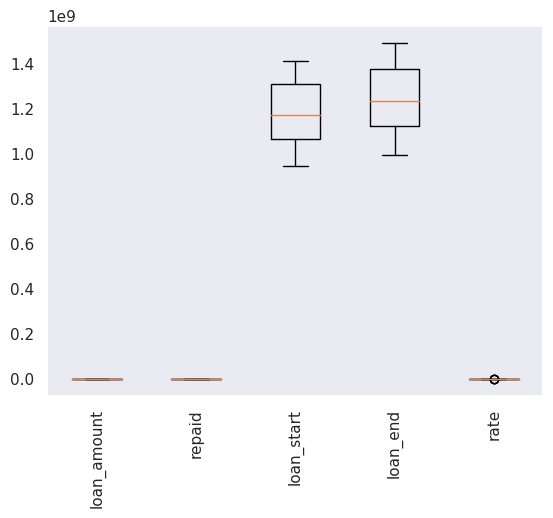

In [473]:
# Plot boxplot of all columns for identification of outliers
import matplotlib.pyplot as plt
%matplotlib inline

# Columns whose data type is object or outliers are not important
df2_dropped = df2.drop(columns=['loan_type'])

plt.boxplot(df2_dropped)
plt.xticks(ticks=range(1, len(df2_dropped.columns) + 1), labels=df2_dropped.columns, rotation=90) # add labels to the x-axis
plt.show()

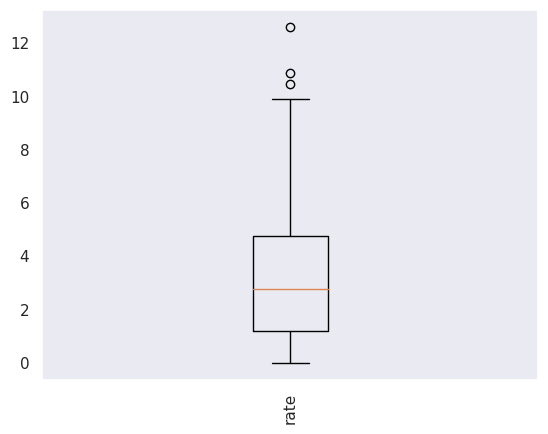

In [474]:
# plot boxplot of rate column with outlier data
plt.boxplot(df2['rate'])
plt.xticks([1], ['rate'], rotation=90)
plt.show()

In [475]:
# Detection and processing of outliers
def remove_outliers(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data >= lower_bound) & (data <= upper_bound)]


df2['rate'] = remove_outliers(df2['rate'])
df2.isnull().sum()    # Replace outliers with Nans
df2 = df2.dropna(subset=['rate'])
df2.isnull().sum()

loan_type      0
loan_amount    0
repaid         0
loan_start     0
loan_end       0
rate           0
dtype: int64

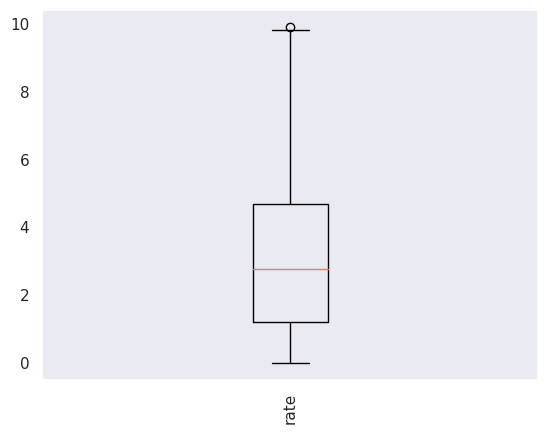

In [476]:
# plot boxplot of 'rate' column after remove outliers
plt.boxplot(df2['rate'])
plt.xticks([1], ['rate'], rotation=90)
plt.show()

### Label Encoding

In [477]:
from sklearn.preprocessing import LabelEncoder

# Specifying how many unique values each column has
print(df2.nunique())

def label_encoder(data, columns):
  data = data.copy()
  le = LabelEncoder()
  for column in columns:
    data[column] = le.fit_transform(data[column])
  return data

df2 = label_encoder(df2, ['loan_type'])
df2

loan_type        4
loan_amount    435
repaid           2
loan_start     427
loan_end       425
rate           333
dtype: int64


,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,2,13672.0,0.0,1018915200,1071878400,2.15
1,1,9794.0,0.0,1066694400,1121558400,1.25
2,2,12734.0,1.0,1138752000,1183593600,0.68
3,0,12518.0,1.0,1291766400,1367712000,1.24
4,1,14049.0,1.0,1278460800,1337558400,3.13
...,...,...,...,...,...,...
438,3,12963.0,0.0,1006732800,1086912000,2.46
439,1,1728.0,1.0,1075161600,1119312000,5.27
440,3,9329.0,0.0,1008547200,1090454400,5.65
441,2,4197.0,0.0,1066262400,1120953600,4.50


### Transformation

============================================================Transformation for loan_amount============================================================


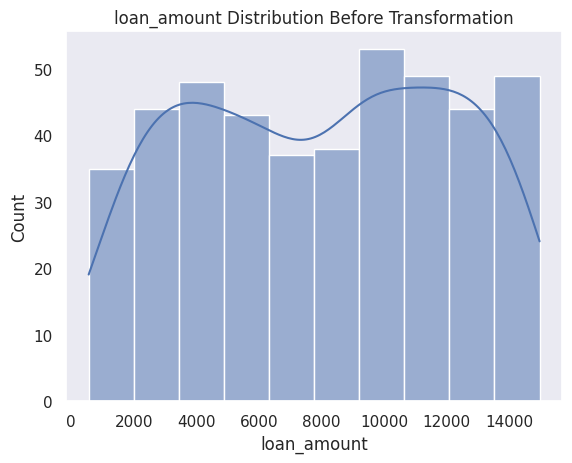

skewness before transformation : -0.04011522267119772
Skewness after Square Root transformation: -0.4718825517922939
Skewness after Logarithm transformation: -1.1046740015725105
Skewness after Reciprocal transformation: 3.3059997538750965
Skewness after Box-Cox transformation: -0.23145699471094328


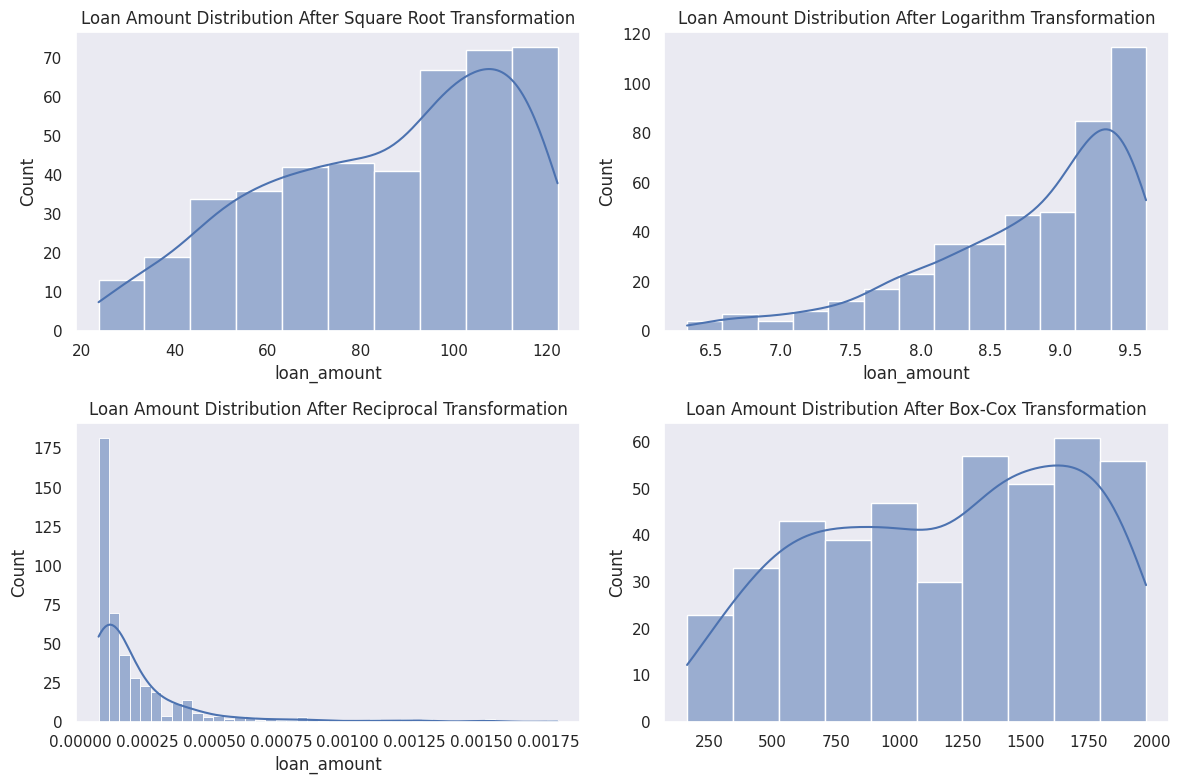

============================================================Transformation for rate============================================================


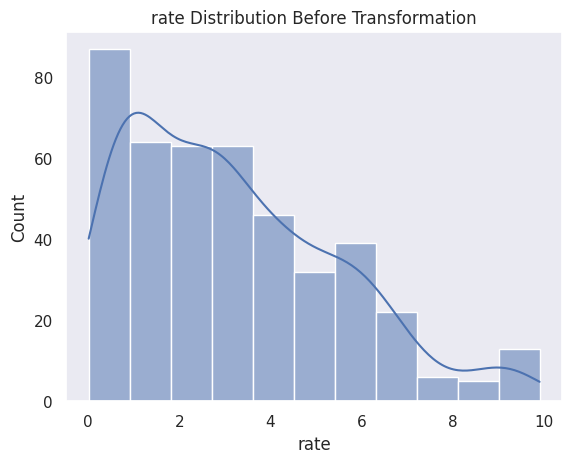

skewness before transformation : 0.884204614329943
Skewness after Square Root transformation: -0.00493530668039362
Skewness after Logarithm transformation: -0.20023538208098293
Skewness after Reciprocal transformation: 1.1375323830611934
Skewness after Box-Cox transformation: -0.03264811868843606


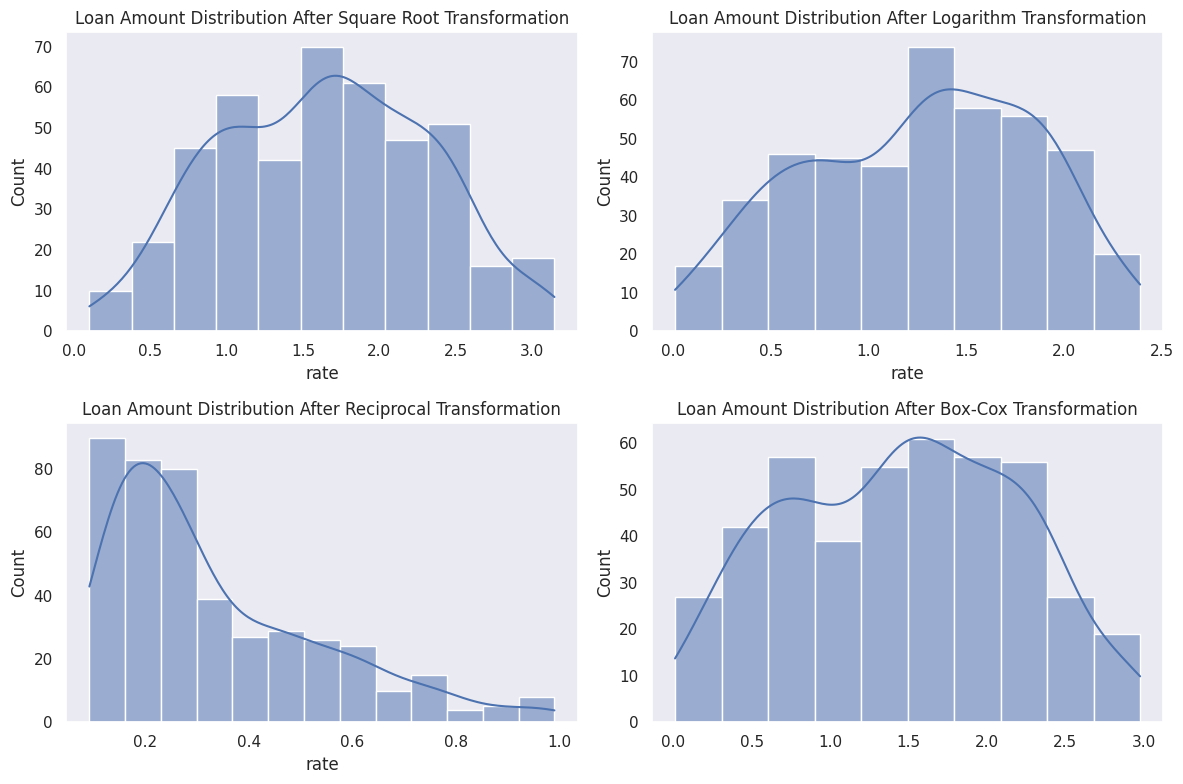

In [478]:
import numpy as np
import seaborn as sns
from scipy import stats

# Plot column distribution before Transformation
def before_plot(data, column):
  data = data.copy()
  if column not in data.columns:
    print(f'Column {column} does not exist in the DataFrame')
    return
  sns.histplot(data[column], kde=True)
  plt.title(f'{column} Distribution Before Transformation')
  plt.show()

# Calculate and print skewness before transformation
def before_skewness(data, column):
  data = data.copy()
  if column not in data.columns:
    print(f'Column {column} does not exist in the DataFrame')
    return
  before_skew = df[column].skew()
  print(f'skewness before transformation : {before_skew}')

# Apply various transformations
def transformations(data, column):
  data = data.copy()
  if column not in data.columns:
    print(f'Column {column} does not exist in the DataFrame')
    return
  transformations={
      'Square Root' : np.sqrt(data[column]),
      'Logarithm' : np.log1p(data[column]),
      'Reciprocal' : np.reciprocal(data[column] + 1),   # Add 1 to avoid division by zero
      'Box-Cox' : stats.boxcox(data[column] + 1)[0]   # Add 1 to ensure all values are positive
  }
  return transformations

# Calculate and print skewness after transformation
def after_skewness(transformations):
  for name, transformed in transformations.items():
    skewness_after = pd.Series(transformed).skew()  # Convert NumPy array to pandas Series and calculate skewness
    print(f'Skewness after {name} transformation: {skewness_after}')

# Plot the transformed distributions and calculate skewness
def plot_transformations(transformations):
  # Define the layout of subplots
  fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 rows, 2 columns
  for (name, transformed), ax in zip(transformations.items(), axes.ravel()):
      sns.histplot(transformed, kde=True, ax=ax)
      ax.set_title(f'Loan Amount Distribution After {name} Transformation')

  plt.tight_layout()
  plt.show()

columns = ['loan_amount', 'rate'] # Columns for transformation
for column in columns :
  print(f"{60*'='}Transformation for {column}{60*'='}")
  before_plot(df2, column) # plot column distribution before transformation
  before_skewness(df2, column) # skewness before column transformation
  transformed_data = transformations(df2, column)
  if transformed_data :
    after_skewness(transformed_data)  # skewness after column transformation
    plot_transformations(transformed_data)  # plot column distribution after transformation

In [479]:
# apply best transformation to columns
# Safely apply transformations using .loc
df2.loc[:, 'loan_amount'] = stats.boxcox(df2[column] + 1)[0]
df2.loc[:, 'rate'] = np.log(df2['rate'])
df2

,loan_type,loan_amount,repaid,loan_start,loan_end,rate
0,2,1.272775,0.0,1018915200,1071878400,0.765468
1,1,0.872282,0.0,1066694400,1121558400,0.223144
2,2,0.543465,1.0,1138752000,1183593600,-0.385662
3,0,0.867139,1.0,1291766400,1367712000,0.215111
4,1,1.613051,1.0,1278460800,1337558400,1.141033
...,...,...,...,...,...,...
438,3,1.388840,0.0,1006732800,1086912000,0.900161
439,1,2.170678,1.0,1075161600,1119312000,1.662030
440,3,2.252647,0.0,1008547200,1090454400,1.731656
441,2,1.991197,0.0,1066262400,1120953600,1.504077


### Define X and y

In [480]:
X = df2.drop('loan_amount', axis=1)
y = df2['loan_amount']
X, y

(     loan_type  repaid  loan_start    loan_end      rate
 0            2     0.0  1018915200  1071878400  0.765468
 1            1     0.0  1066694400  1121558400  0.223144
 2            2     1.0  1138752000  1183593600 -0.385662
 3            0     1.0  1291766400  1367712000  0.215111
 4            1     1.0  1278460800  1337558400  1.141033
 ..         ...     ...         ...         ...       ...
 438          3     0.0  1006732800  1086912000  0.900161
 439          1     1.0  1075161600  1119312000  1.662030
 440          3     0.0  1008547200  1090454400  1.731656
 441          2     0.0  1066262400  1120953600  1.504077
 442          2     0.0  1269388800  1324512000 -2.040221
 
 [440 rows x 5 columns],
 0      1.272775
 1      0.872282
 2      0.543465
 3      0.867139
 4      1.613051
          ...   
 438    1.388840
 439    2.170678
 440    2.252647
 441    1.991197
 442    0.123555
 Name: loan_amount, Length: 440, dtype: float64)

### Standardization

In [481]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_X = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame, preserving the column names
scaled_X_df = pd.DataFrame(scaled_X, columns=X.columns)
scaled_X_df

# Combine the scaled features and the target into one DataFrame
result_df = pd.concat([scaled_X_df, y.reset_index(drop=True)], axis=1)
result_df

,loan_type,repaid,loan_start,loan_end,rate,loan_amount
0,0.443967,-1.070673,-1.216000,-1.297269,0.011893,1.272775
1,-0.460411,-1.070673,-0.869085,-0.938120,-0.479119,0.872282
2,0.443967,0.933992,-0.345890,-0.489652,-1.030323,0.543465
3,-1.364788,0.933992,0.765116,0.841386,-0.486392,0.867139
4,-0.460411,0.933992,0.668507,0.623398,0.351924,1.613051
...,...,...,...,...,...,...
435,1.348345,-1.070673,-1.304454,-1.188588,0.133842,1.388840
436,-0.460411,0.933992,-0.807607,-0.954360,0.823627,2.170678
437,1.348345,-1.070673,-1.291280,-1.162979,0.886665,2.252647
438,0.443967,-1.070673,-0.872222,-0.942493,0.680619,1.991197


### Correlation

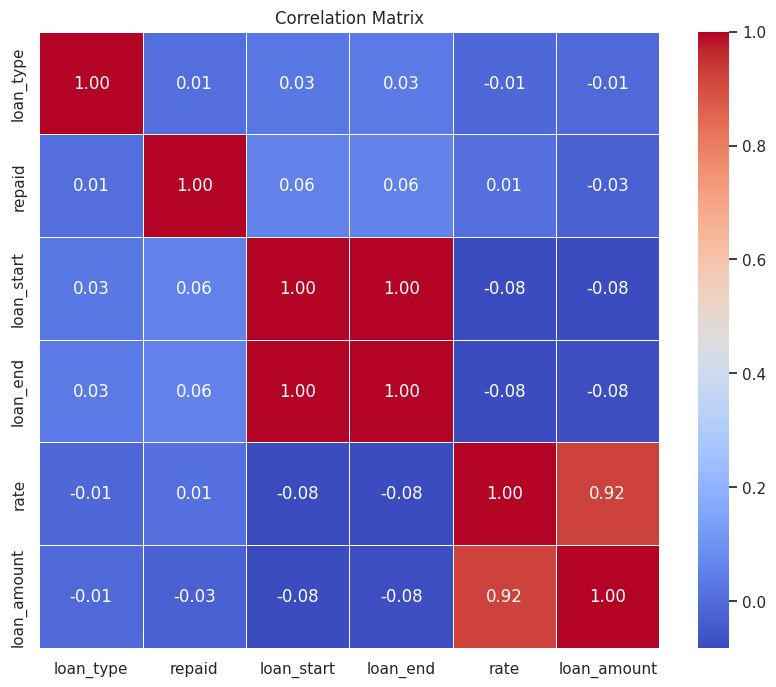

In [482]:
# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(result_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### New Variables

In [483]:
from sklearn.preprocessing import PolynomialFeatures

# Define a list for feature name for MLR and Polynomial regression
features = ['loan_type', 'repaid', 'loan_start', 'loan_end', 'rate']

# Determining the target value for SLR, MLR, POL
y_SLR, y_MLR, y_POL = y, y, y

# Determining the X values for SLR
X_SLR = scaled_X_df[['rate']]
# Determining the X values for MLR
X_MLR = scaled_X_df[features]

# Determining the X values for POL with degree=2
pf2 = PolynomialFeatures(degree=2)
X_POL2 = pf2.fit_transform(scaled_X_df[features])

# Determining the X values for POL with degree=3
pf3 = PolynomialFeatures(degree=3)
X_POL3 = pf3.fit_transform(scaled_X_df[features])

### Split data to train and test

In [484]:
# Split data to train and test
from sklearn.model_selection import train_test_split

# SLR
X_train_SLR, X_test_SLR, y_train_SLR, y_test_SLR = train_test_split(X_SLR, y_SLR, test_size=0.2, random_state=42)
print(X_train_SLR.shape, X_test_SLR.shape, y_train_SLR.shape, y_test_SLR.shape)

# MLR
X_train_MLR, X_test_MLR, y_train_MLR, y_test_MLR = train_test_split(X_MLR, y_MLR, test_size=0.2, random_state=42)
print(X_train_MLR.shape, X_test_MLR.shape, y_train_MLR.shape, y_test_MLR.shape)

# Polynomial degree2
X_train_POL2, X_test_POL2, y_train_POL2, y_test_POL2 = train_test_split(X_POL2, y_POL, test_size=0.2, random_state=42)
print(X_train_POL2.shape, X_test_POL2.shape, y_train_POL2.shape, y_test_POL2.shape)

# Polynomial degree3
X_train_POL3, X_test_POL3, y_train_POL3, y_test_POL3 = train_test_split(X_POL3, y_POL, test_size=0.2, random_state=42)
print(X_train_POL3.shape, X_test_POL3.shape, y_train_POL3.shape, y_test_POL3.shape)

(352, 1) (88, 1) (352,) (88,)
(352, 5) (88, 5) (352,) (88,)
(352, 21) (88, 21) (352,) (88,)
(352, 56) (88, 56) (352,) (88,)
